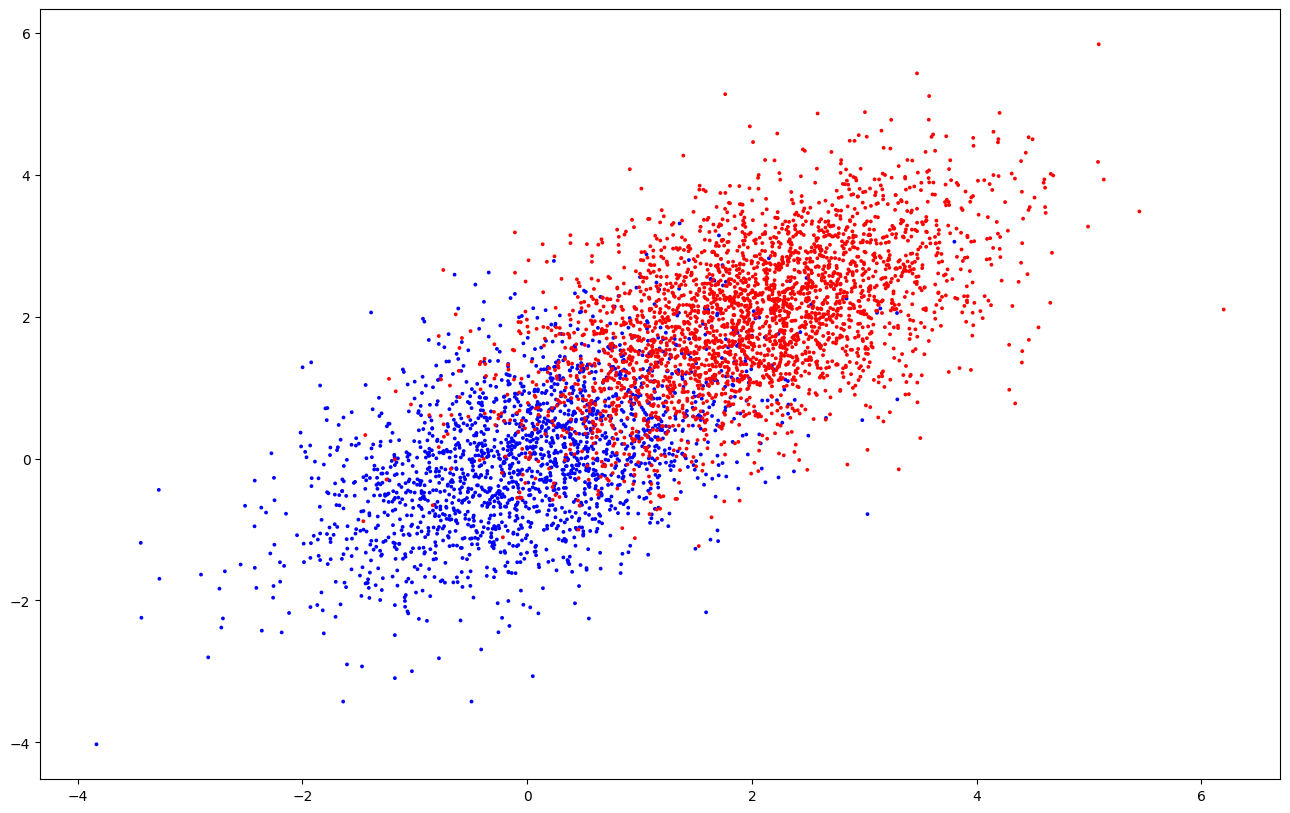

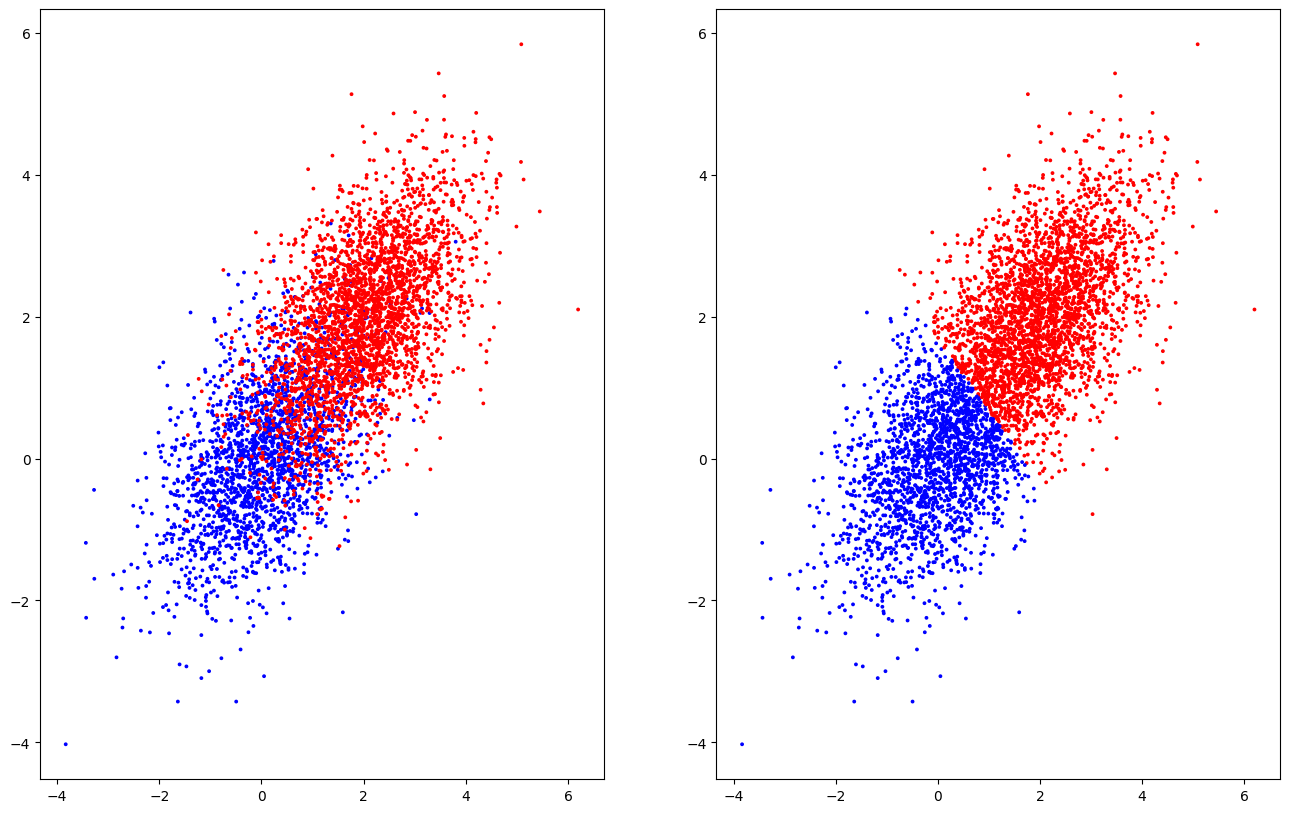

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   M1      100 non-null    int64
 1   M2      100 non-null    int64
 2   M3      100 non-null    int64
 3   M4      100 non-null    int64
dtypes: int64(4)
memory usage: 3.2 KB


(52, 4)

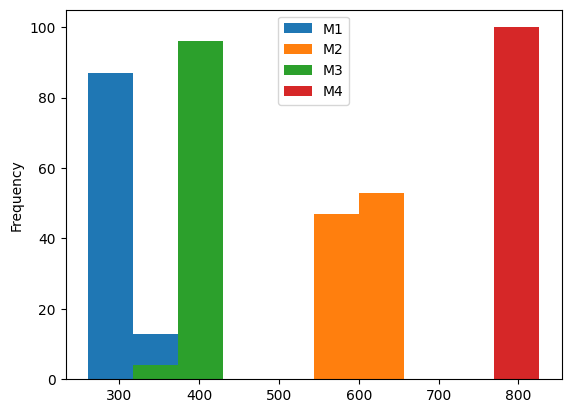

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

### Datos

# Supongamos que tenemos dos distribuciones normales multivariadas. Es decir, cada distribución tiene media 0. Y cada distribución tiene 5000 muestras.

mu0 = [0, 0] # Vector de medias, siempre se puede asumir como 0,0
sigma0 = np.array([[1, 0.5], [0.5, 1]]) # Matriz de covarianza, simétrica y positiva definida
sigma1 = np.array([[1, 0.5], [0.5, 1]]) # Otra matriz de covarianza, simétrica y positiva definida

# Generar 5000 datos a partir de una distribución normal multivariada con media mu0 y covarianza sigma0
X = np.random.multivariate_normal(mu0, sigma0, 5000)
X

# Desplazar las últimas 3000 muestras (a partir de la muestra 2000) en 2 unidades en ambas dimensiones
X[2000:, 0] = X[2000:, 0] + 2
X[2000:, 1] = X[2000:, 1] + 2

# Crear un vector de etiquetas donde las primeras 2000 son 0 y las siguientes 3000 son 1
y = np.ones((5000,))
y[:2000] = 0

X[:6, :], y[:6]

### Visualización

# Crear un gráfico de dispersión para visualizar los datos generados
fig, ax = plt.subplots(1, 1, figsize=(16, 10))
plt.scatter(X[:, 0], X[:, 1], s=3, c=list(map(lambda x:'blue' if x==0 else 'red', y)))
plt.show()

### Regla de Clasificación

# Definir las funciones de densidad de probabilidad para ambas clases
mu0 = np.array([[0], [0]])
mu1 = np.array([[2], [2]])

# Definir la función de densidad para la clase y=0
def f_x_y_0(x):
    const = 1 / (2 * np.pi * np.power(np.linalg.det(sigma0), 1/2))
    return const * np.exp(-0.5 * (x - mu0).T @ np.linalg.inv(sigma0) @ (x - mu0))[0, 0]

# Definir la función de densidad para la clase y=1
def f_x_y_1(x):
    const = 1 / (2 * np.pi * np.power(np.linalg.det(sigma1), 1/2))
    return const * np.exp(-0.5 * (x - mu1).T @ np.linalg.inv(sigma1) @ (x - mu1))[0, 0]

# Calcular las densidades en el punto (0.5, 0.5) para ambas clases
f_x_y_0(np.array([[0.5], [0.5]]))
f_x_y_1(np.array([[0.5], [0.5]]))

# Calcular la media muestral y la covarianza muestral para ambas clases
mu0_hat = np.mean(X[:2000, :], axis=0)
sigma0_hat = np.cov(X[:2000, :].T)
mu0_hat, sigma0_hat

mu1_hat = np.mean(X[2000:, :], axis=0)
sigma1_hat = np.cov(X[2000:, :].T)
mu1_hat, sigma1_hat

# Definir las funciones de densidad estimadas para ambas clases
def fhat_x_y_0(x):
    const = 1 / (2 * np.pi * np.power(np.linalg.det(sigma0_hat), 1/2))
    return const * np.exp(-0.5 * (x - mu0_hat).T @ np.linalg.inv(sigma0_hat) @ (x - mu0_hat))[0, 0]

def fhat_x_y_1(x):
    const = 1 / (2 * np.pi * np.power(np.linalg.det(sigma1_hat), 1/2))
    return const * np.exp(-0.5 * (x - mu1_hat).T @ np.linalg.inv(sigma1_hat) @ (x - mu1_hat))[0, 0]

# Calcular las densidades estimadas en el punto (0.5, 0.5) para ambas clases
fhat_x_y_0(np.array([[0.5], [0.5]]))
fhat_x_y_1(np.array([[0.5], [0.5]]))

# Definir las probabilidades a priori para ambas clases
p0 = 2000/5000
p1 = 1 - p0

# Definir una función para calcular la probabilidad de Bayes
def bayes_prob(x, y):
    if y == 1:
        return f_x_y_1(x) * p1 / (f_x_y_0(x) * p0 + f_x_y_1(x) * p1)
    else:
        return f_x_y_0(x) * p0 / (f_x_y_0(x) * p0 + f_x_y_1(x) * p1)

# Calcular la probabilidad de Bayes en el punto (0.5, 0.5) para ambas clases
bayes_prob(np.array([[0.5], [0.5]]), 0)
bayes_prob(np.array([[0.5], [0.5]]), 1)

# Definir las probabilidades a priori estimadas para ambas clases
p0_hat = 2000 / 5000
p1_hat = 3000 / 5000

# Definir una función para calcular la probabilidad de Bayes estimada
def bayes_prob_hat(x, y):
    if y == 1:
        return fhat_x_y_1(x) * p1_hat / (fhat_x_y_0(x) * p0_hat + fhat_x_y_1(x) * p1_hat)
    else:
        return fhat_x_y_0(x) * p0_hat / (fhat_x_y_0(x) * p0_hat + fhat_x_y_1(x) * p1_hat)

# Calcular la probabilidad de Bayes estimada en el punto (0.5, 0.5) para ambas clases
bayes_prob_hat(np.array([[0.5], [0.5]]), 0), bayes_prob_hat(np.array([[0.5], [0.5]]), 1)

# Confirmar que el dato (0.5, 0.5) se clasifica con la etiqueta 0
lda = LinearDiscriminantAnalysis(n_components=1, solver='svd', store_covariance=True).fit(X, y)

lda.means_

# Extraer las medias y la covarianza estimadas por el modelo LDA
mu0 = lda.means_[0, :]
mu1 = lda.means_[1, :]
lda_cov = lda.covariance_

mu0, mu1, lda_cov

# Definir una función discriminadora basada en el modelo LDA
def discriminator(x):
    d0 = x.T @ np.linalg.inv(lda_cov) @ mu0 - 0.5 * mu0.T @ np.linalg.inv(lda_cov) @ mu0 + np.log(p0)
    d1 = x.T @ np.linalg.inv(lda_cov) @ mu1 - 0.5 * mu1.T @ np.linalg.inv(lda_cov) @ mu1 + np.log(p1)
    return [d0[0], d1[0]]

# Calcular la clase predicha para el punto (0.5, 0.5) usando el discriminador
np.argmax(discriminator(np.array([[0.5], [0.5]])))

# Evaluar la precisión del modelo LDA ajustado

# Predecir las etiquetas para todos los datos usando el discriminador
y_hat = np.apply_along_axis(lambda x: np.argmax(discriminator(np.reshape(x, (2, 1)))), 1, X)

# Visualizar los datos reales y las predicciones del modelo LDA
fig, ax = plt.subplots(1, 2, figsize=(16, 10))
ax[0].scatter(X[:, 0], X[:, 1], s=3, c=list(map(lambda x:'blue' if x==0 else 'red', y)))
ax[1].scatter(X[:, 0], X[:, 1], s=3, c=list(map(lambda x:'blue' if x==0 else 'red', y_hat)))
plt.show()

# Calcular la precisión del modelo LDA
(y == y_hat).mean()

# Segregación de datos

import numpy as np

# Crear un diccionario con muestras de distribuciones binomiales
diccionario = {"M1": np.random.binomial(1000, 0.3, 100),
               "M2": np.random.binomial(1000, 0.6, 100),
               "M3": np.random.binomial(1000, 0.4, 100),
               "M4": np.random.binomial(1000, 0.8, 100)}

import pandas as pd

np.random.seed(1)

# Crear un DataFrame a partir del diccionario
df = pd.DataFrame(diccionario)
df

df.info()

# Seleccionar una columna del DataFrame
df['M1']

# Calcular la media de la columna M1
np.mean(df['M1'])

# Calcular la varianza muestral de la columna M1
np.var(df['M1'], ddof=1)

# Seleccionar múltiples columnas del DataFrame
df[['M1', 'M2']]

df

# Seleccionar la primera fila del DataFrame
df.iloc[0]

# Calcular la media de la primera fila del DataFrame
df.iloc[0].mean()

# Calcular la media de la última fila del DataFrame
df.iloc[99].mean()

# Obtener el número de dimensiones del DataFrame
df.ndim

# Calcular la media de cada columna del DataFrame
df.mean(0)

# Calcular la media de cada fila del DataFrame
df.mean(1)

# Realizar segregaciones de datos

# Seleccionar las primeras 51 filas del DataFrame
df[0:51]

# Seleccionar filas con un paso de 51
df[0::51]

# Crear un histograma de los datos en el DataFrame
df.plot.hist()

# Obtener el valor máximo de cada columna del DataFrame
df.max(axis=0)

# Filtrar el DataFrame para obtener filas donde la columna M1 es mayor que 300
df2 = df[df["M1"] > 300]
df2

# Obtener la forma (dimensiones) del DataFrame filtrado
df2.shape

